In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [75]:
# load the data
dir = os.path.join(os.getcwd(), 'model_output/sample_2pop/20240708_143209/seir/')
simout = pd.read_parquet(dir + '000000001.20240708_143209.seir.parquet')
simout = simout.drop(columns='mc_name')

# construct a desired index (date, space, state)
dates = simout['date'].unique()
spatial_patches = ['small_province', 'large_province']
value_types = simout['mc_value_type'].unique()
disease_states = simout['mc_infection_stage'].unique()
idx = pd.MultiIndex.from_product([dates, spatial_patches, disease_states],
                           names=['date', 'spatial_patch', 'disease_state'])

# values as columns
value_types = simout['mc_value_type'].unique()

# construct the 'desired' dataframe
new_simout = pd.DataFrame(index=idx, columns=value_types)

# fill in the data

# small province
for inc in value_types:
    # get data
    tmp = simout[simout['mc_value_type'] == inc]
    tmp = tmp.drop(columns=['large_province', 'mc_value_type'])
    tmp = tmp.set_index(['date', 'mc_infection_stage'])
    # assign to 'desired' dataframe
    new_simout.loc[(slice(None), 'small_province', slice(None)), inc] = tmp.values

# large province
for inc in value_types:
    # get data
    tmp = simout[simout['mc_value_type'] == inc]
    tmp = tmp.drop(columns=['small_province', 'mc_value_type'])
    tmp = tmp.set_index(['date', 'mc_infection_stage'])
    # assign to 'desired' dataframe
    new_simout.loc[(slice(None), 'large_province', slice(None)), inc] = tmp.values

In [76]:
new_simout

incidence   prevalence
date       spatial_patch  disease_state                       
2020-02-01 small_province S                   0.0       1000.0
                          E              0.000307          0.0
                          I              0.000024          0.0
                          R              0.000001          0.0
           large_province S                   0.0       8995.0
...                                           ...          ...
2020-05-31 small_province R              1.448748   878.145815
           large_province S                   0.0   971.013228
                          E              0.552228     4.006324
                          I              0.950878    10.459541
                          R              1.986548  8014.520907

[968 rows x 2 columns]

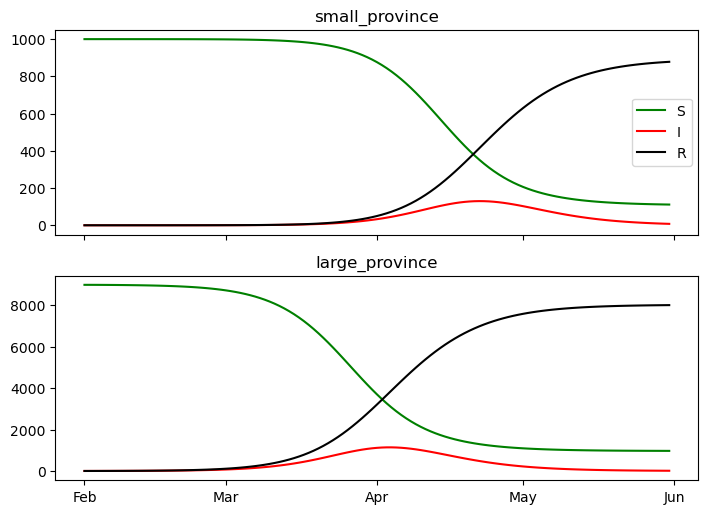

In [67]:
fig,ax=plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8.3, 11.7/2))

for i, sp in enumerate(spatial_patches):
    ax[i].plot(dates, new_simout.loc[(slice(None), sp, 'S'), 'prevalence'], color='green', label='S')
    ax[i].plot(dates, new_simout.loc[(slice(None), sp, 'I'), 'prevalence'], color='red', label='I')
    ax[i].plot(dates, new_simout.loc[(slice(None), sp, 'R'), 'prevalence'], color='black', label='R')
    ax[i].set_title(sp)

ax[0].legend()
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()
plt.close()